In [1]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/0518_data.csv'
df = pd.read_csv(csvFile)
df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,2,경기도,평택시,125.0,21.0,4,PSCI거더교,B,DB-24,37,5,25.0,21443.0
1,풍계교,3,경기도,이천시,55.0,20.0,2,RC슬래브교,B,DB-24,27,4,15.0,5654.0
2,태평교,3,경기도,여주시,43.8,19.5,4,PSCI거더교,B,DB-24,32,2,21.9,8750.0
3,장평교,2,경기도,이천시,105.0,19.5,4,RC슬래브교,B,DB-24,30,7,15.0,14150.0
4,덕평교,3,경기도,여주시,32.0,10.0,2,RC슬래브교,B,DB-24,27,2,16.0,3739.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5680 non-null   object 
 1   시설물종별등급구분  5680 non-null   object 
 2   시도         5680 non-null   object 
 3   시군구        5680 non-null   object 
 4   교량연장       5680 non-null   float64
 5   교량폭        5680 non-null   float64
 6   차로수        5680 non-null   int64  
 7   상부구조형식     5680 non-null   object 
 8   최종안전점검결과   5680 non-null   object 
 9   설계활하중      5680 non-null   object 
 10  준공후경과년수    5680 non-null   int64  
 11  경간수        5680 non-null   int64  
 12  최대경간장      5680 non-null   float64
 13  교통량        5680 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 621.4+ KB


## 데이터 인코딩

In [4]:
def encode_features(df):
    features = ['시설물종별등급구분', '최종안전점검결과', '상부구조형식', '설계활하중']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [5]:
bridge_df = encode_features(df)
bridge_df.head()

,교량명,시설물종별등급구분,시도,시군구,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,진위교,1,경기도,평택시,125.0,21.0,4,0,1,2,37,5,25.0,21443.0
1,풍계교,2,경기도,이천시,55.0,20.0,2,6,1,2,27,4,15.0,5654.0
2,태평교,2,경기도,여주시,43.8,19.5,4,0,1,2,32,2,21.9,8750.0
3,장평교,1,경기도,이천시,105.0,19.5,4,6,1,2,30,7,15.0,14150.0
4,덕평교,2,경기도,여주시,32.0,10.0,2,6,1,2,27,2,16.0,3739.0


In [6]:
# 각 범주변수의 인코딩 확인
# 0: 1종, 1: 2종, 2: 3종, 3: 기타
bridge_df['시설물종별등급구분'].unique()

array([1, 2, 0, 3])

In [7]:
# 0: A, 1: B, 2: C, 3: D, 4: E
bridge_df['최종안전점검결과'].unique()

array([1, 2, 0, 3, 4])

In [8]:
# 0: PSCI거더교 부터 16: 프리플랙스거더교 까지
bridge_df['상부구조형식'].unique()

array([ 0,  6, 17,  9, 12,  7, 10, 14,  1, 15, 11,  2,  4,  3,  8, 13,  5,
       16])

In [9]:
# 0: DB-13.5, 1: DB-18, 2: DB-24, 3: DB-9, 4: 기타, 5: 미상
bridge_df['설계활하중'].unique()

array([2, 1, 0, 4, 3])

## 불필요컬럼 삭제

In [10]:
# 필요없는 변수 제외(교량명, 시군구, 위도, 경도 등)
bridge_df = bridge_df.drop(['교량명', '시도', '시군구'], axis = 1)
bridge_df.head()

,시설물종별등급구분,교량연장,교량폭,차로수,상부구조형식,최종안전점검결과,설계활하중,준공후경과년수,경간수,최대경간장,교통량
0,1,125.0,21.0,4,0,1,2,37,5,25.0,21443.0
1,2,55.0,20.0,2,6,1,2,27,4,15.0,5654.0
2,2,43.8,19.5,4,0,1,2,32,2,21.9,8750.0
3,1,105.0,19.5,4,6,1,2,30,7,15.0,14150.0
4,2,32.0,10.0,2,6,1,2,27,2,16.0,3739.0


## 데이터 모델링

In [11]:
y_bridge_df = bridge_df['최종안전점검결과']
X_bridge_df = bridge_df.drop(['최종안전점검결과'], axis = 1)

In [12]:
X_bridge_df.shape

(5680, 10)

In [13]:
y_bridge_df.shape

(5680,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_bridge_df, y_bridge_df, test_size = 0.3, random_state = 12)

In [15]:
# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 12)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정트리 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

의사결정트리 정확도: 0.828


## 트리 시각화

In [16]:
from sklearn.tree import export_graphviz
import graphviz
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
dot_data = export_graphviz(dt_clf, out_file = None, feature_names=  X_train.columns,
                           filled = True, rounded = True, impurity = True, special_characters = True, fontname = 'NanumGothic')

# 그래프 생성
graph = graphviz.Source(dot_data)

# 그래프 출력
graph.render("decision_tree")

'decision_tree.pdf'

In [17]:
graph.format = 'png'
graph.render("decision_tree")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.675372 to fit


'decision_tree.png'

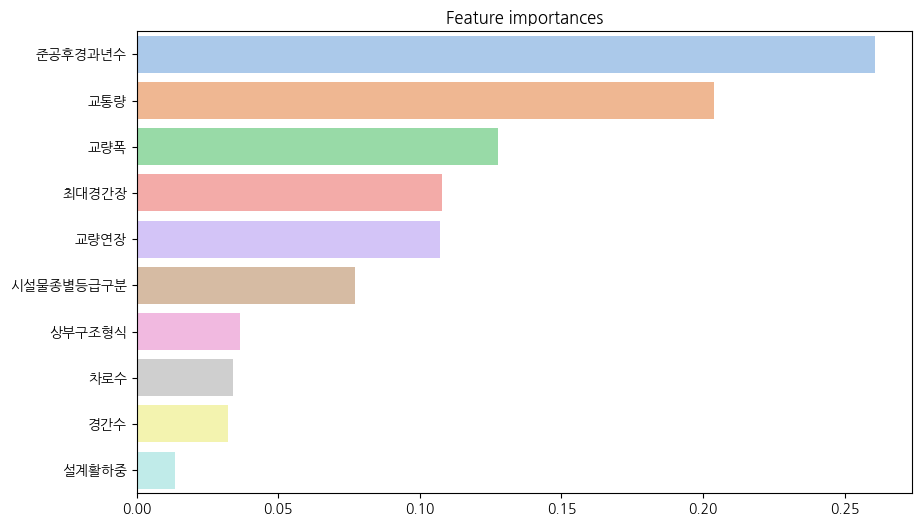

In [18]:
# 전체 모델에서의 중요도가 높은 요인 시각화
ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending = False)
plt.figure(figsize = (10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_top , y = ftr_top.index, palette = 'pastel')
plt.show()

## 교차검증

In [19]:
# cross_val_score()
scores = cross_val_score(dt_clf, X_bridge_df, y_bridge_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.6708
교차 검증 1 정확도: 0.6215
교차 검증 2 정확도: 0.5792
교차 검증 3 정확도: 0.6743
교차 검증 4 정확도: 0.6857
평균 정확도: 0.6463


In [20]:
# grid_search
# 파라미터의 범위를 0~9까지로 제한(과적합 방지 위해)
parameters = {'max_depth':[i for i in range(10)], 'min_samples_split':[i for i in range(10)],
              'min_samples_leaf':[i for i in range(10)], 'max_features': [i for i in range(10)]}

grid_cv = GridSearchCV(dt_clf , param_grid = parameters , scoring = 'accuracy' , cv = 5)
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_cv.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8438


## 최적의 모델

In [21]:
# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 12, max_depth = 7, max_features = 7,
                                min_samples_leaf = 8, min_samples_split = 2)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정트리 정확도: {0:.3f}'.format(accuracy_score(y_test, dt_pred)))

의사결정트리 정확도: 0.842


In [22]:
from sklearn.tree import export_graphviz
import graphviz
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
dot_data = export_graphviz(dt_clf, out_file=None, feature_names = X_train.columns,
                           filled = True, rounded = True, impurity = True,
                           special_characters = True, fontname = 'NanumGothic')

# 그래프 생성
graph = graphviz.Source(dot_data)

# 그래프 출력
graph.format = 'png'
graph.render("decision_tree1")

'decision_tree1.png'

In [23]:
graph.format = 'pdf'
graph.render("decision_tree1")

'decision_tree1.pdf'

* 주황색이 A, 초록색이 B, 민트색이 C, 파란색이 D, 핑크색이 E로 분류되는 것으로 예상
* 데이터상에도 안전등급이 D인 데이터의 개수가 작아서 더 많은 데이터를 모델링하거나 하이퍼파라미터를 늘려서 탐색하게 된다면 D등급 분류결과도 확실히 볼것으로 추측(앞서 파라미터를 조정하지 않은 모델을 돌렸을 때 D등급이 파란색으로 분류가 되었음을 확인)

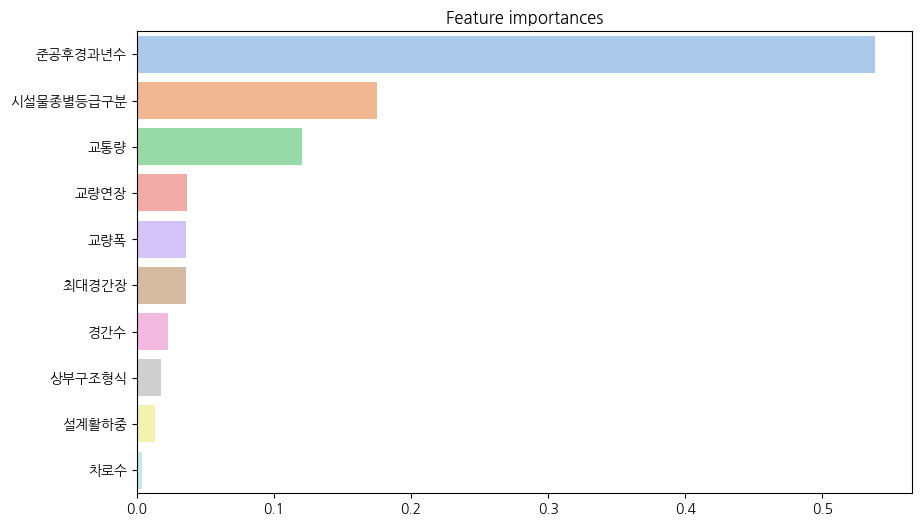

In [24]:
# 중요도가 높은 요인 시각화
ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top = ftr_importances.sort_values(ascending = False)
plt.figure(figsize = (10,6))
plt.title('Feature importances')
sns.barplot(x = ftr_top , y = ftr_top.index, palette = 'pastel')
plt.show()

* 추가적인 데이터 정제, 스케일링, 하이퍼파라미터 조절 등으로 정확도나 그래프의 속성은 바뀔것으로 생각됨
* 기존 데이터셋보다 정확도가 소폭 감소했으나 트리맵을 보았을때 기존모델보다 등급분류가 다채롭게 된 것을 볼 수 있음